In [1]:
# Traffic Speed Prediction – Model Training

This notebook trains and compares machine learning models to predict traffic speed
using road, weather, and time-based features.

In [ ]:
import sys
!{sys.executable} -m pip install pandas numpy

In [2]:
import pandas as pd
import numpy as np

In [3]:
import sys
!{sys.executable} -m pip install scikit-learn

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [5]:
df = pd.read_csv("../data/processed/delhi_traffic_filtered.csv")
df.head()

,speed,free_flow,traffic_volume,confidence,lanes,maxspeed,temp,humidity,pressure,wind_speed,hour,day,highway
0,19,34,15,1.0,NaN,NaN,15.99,67,1017,0,20,1,2
1,19,34,15,1.0,NaN,NaN,15.86,63,1017,0,20,1,2
2,19,34,15,1.0,NaN,NaN,15.76,63,1017,0,20,1,2
3,19,34,15,1.0,NaN,NaN,15.73,63,1017,0,20,1,2
4,19,34,15,1.0,NaN,NaN,15.82,63,1017,0,20,1,2


In [6]:
df["is_rush_hour"]=(
    ((df["hour"]>=8) & (df["hour"]<=11)) |
    ((df["hour"]>=17) & (df["hour"]<=21))
).astype(int)

df["is_weekend"]=(df["day"]>=5).astype(int)

df[["hour", "day", "is_rush_hour", "is_weekend"]].head(10)


,hour,day,is_rush_hour,is_weekend
0,20,1,1,0
1,20,1,1,0
2,20,1,1,0
3,20,1,1,0
4,20,1,1,0
5,20,1,1,0
6,20,1,1,0
7,20,1,1,0
8,20,1,1,0
9,20,1,1,0


In [7]:
y=df["speed"]
x= df.drop(columns=[
    "traffic_volume",
    "speed",
    "free_flow"
])

Index(['confidence', 'lanes', 'maxspeed', 'temp', 'humidity', 'pressure',
       'wind_speed', 'hour', 'day', 'highway', 'is_rush_hour', 'is_weekend'],
      dtype='str')


In [8]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
## Baseline Model: Random Forest Regressor

Random Forest is used as a baseline ensemble model due to its robustness
and ability to handle non-linear relationships.

In [9]:
model=RandomForestRegressor(n_estimators=100,random_state=42)

model.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [ ]:
## Model Evaluation and Comparison

In [10]:
y_pred=model.predict(x_test)

In [11]:
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("MAE:", mae)
print("R2 score:", r2)

MAE: 3.6042102873977875
R2 score: 0.5750108727846015


In [12]:
import sys
!{sys.executable} -m pip install matplotlib

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(
    model.feature_importances_,
    index=x.columns
).sort_values(ascending=False)

importances

highway         0.873278
temp            0.108261
humidity        0.018461
confidence      0.000000
lanes           0.000000
maxspeed        0.000000
pressure        0.000000
wind_speed      0.000000
hour            0.000000
day             0.000000
is_rush_hour    0.000000
is_weekend      0.000000
dtype: float64

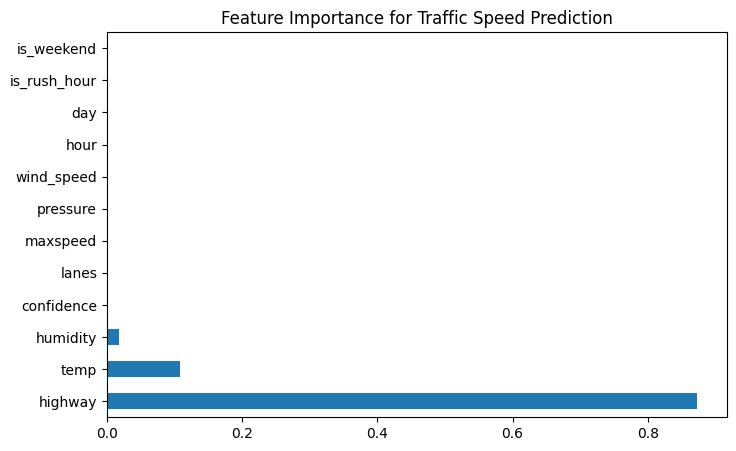

In [14]:
importances.plot(kind="barh", figsize=(8,5))
plt.title("Feature Importance for Traffic Speed Prediction")
plt.show()

In [15]:
import sys
!{sys.executable} -m pip install xgboost

In [ ]:
## Advanced Model: XGBoost Regressor

XGBoost is a gradient boosting model that builds trees sequentially
to correct previous errors.

In [16]:
## Improved Model: XGBoost

from xgboost import XGBRegressor

xgb_model=XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42
)

xgb_model.fit(x_train,y_train)
        


,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,0.8
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_meth

In [ ]:
## Model Evaluation and Comparison

In [17]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred_xgb=xgb_model.predict(x_test)

print("XGBoost MAE:", mean_absolute_error(y_test,y_pred_xgb))
print("XGBoost R2:", r2_score(y_test, y_pred_xgb))


XGBoost MAE: 3.8746938705444336
XGBoost R2: 0.5505127906799316
